<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/Sin_Test_use_Conv1D_for_CNN_N_Value_Verify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sin波不同頻率用來測試CNN的N值判斷是否能夠正確判別。

**此Sin波模擬類似上肢啞鈴曲舉的前臂角度變化或加速度變化，用於分析六軸感測系統IMU之分析方法。**

Lv1-正常,訓練量3張

Lv2-虛弱,訓練量3張

Lv4-中途放棄(正常),訓練量6張

Lv5-中途放棄(虛弱),訓練量6張

## 雲端硬碟權限指令

In [1]:
#讀雲端資料存取方法
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Main路徑測試
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證

'Sin Test for CNN N Value Verify3.ipynb'   test1
 SinWaveEventTest.ipynb			   train


# CNN-1維卷積運算測試

## 數據模擬1D

▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼


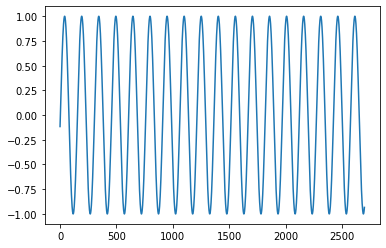

▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼


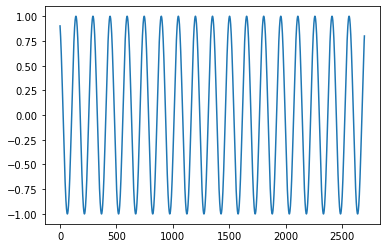

▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼


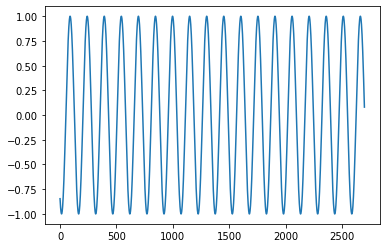

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=1

for i in range(0,3,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


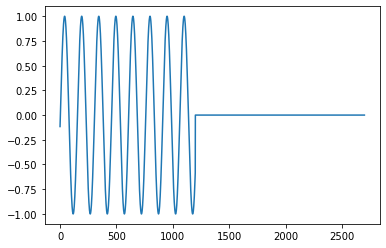

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


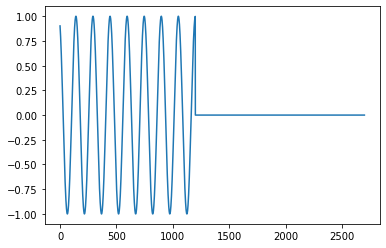

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


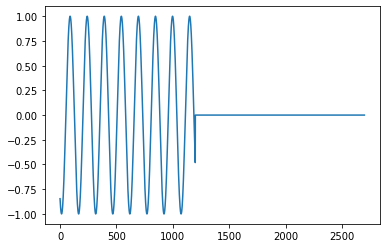

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


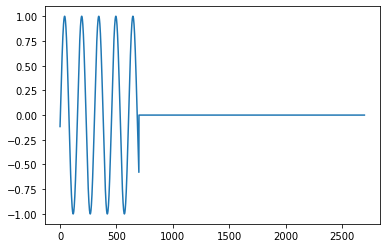

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


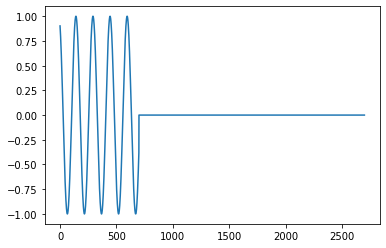

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


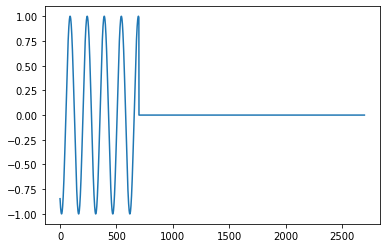

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz 中斷訊號)
import numpy as np
from matplotlib import pyplot as plt

Lv=3

for i in range(0,6,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==3:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==4:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==5:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)
  

▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼


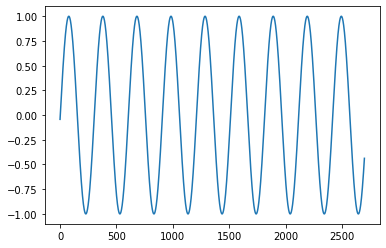

▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼


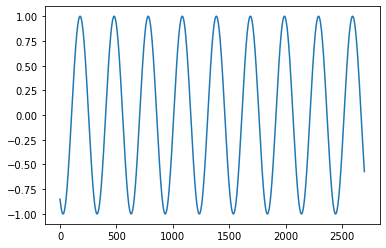

▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼


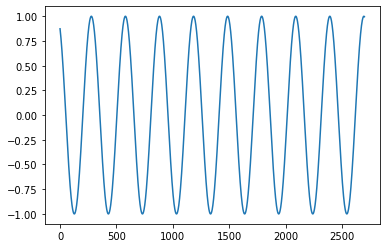

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=2

for i in range(0,3,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()
  
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


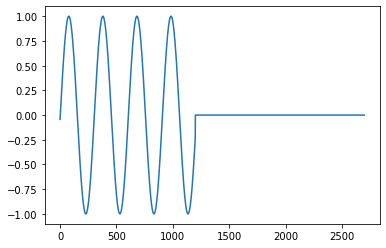

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


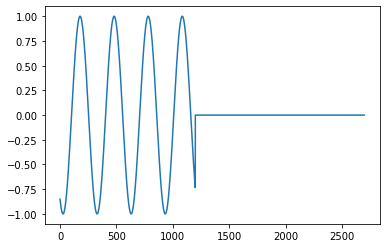

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


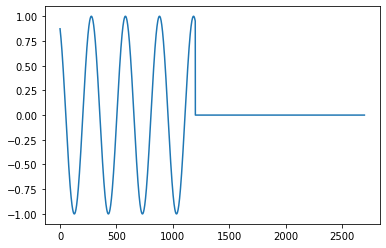

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


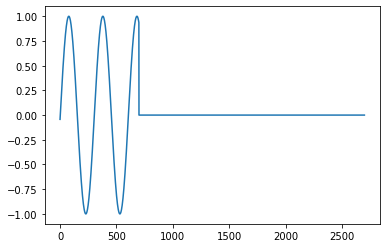

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


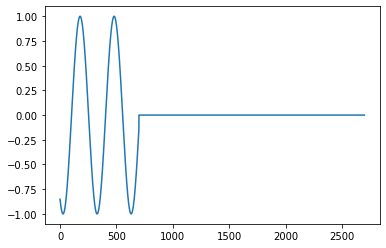

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


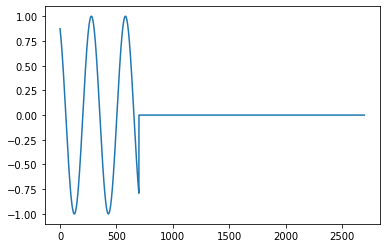

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=4

for i in range(6,12,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==6:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==7:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==8:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==9:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==10:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==11:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

## CNN方法

In [2]:
#讀圖測試
import numpy as np
import cv2
import os

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D'
path = os.path.join(train_dir)
X = []
y = []

def Lv_convert(get_category):#訓練陣列指引
  if get_category=='Lv1':
    return 0
  elif get_category=='Lv2':
    return 1
  elif get_category=='Lv3':
    return 2
  elif get_category=='Lv4':
    return 3

def create_train_data(path):#輸出訓練陣列
    for p in os.listdir(path):
        #print(os.path.join(path,p))
        category = p.split(".")[0]
        category = Lv_convert(category)
        img_array = np.load(os.path.join(path,p))
        #print(img_array)
        X.append(img_array)
        y.append(category)

create_train_data(path)

X = np.array(X).reshape(-1, 2700, 1)
y = np.array(y)
print('訓練資料集維度=',X.shape)
print('分級資料=',y)


訓練資料集維度= (18, 2700, 1)
分級資料= [0 0 0 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3]


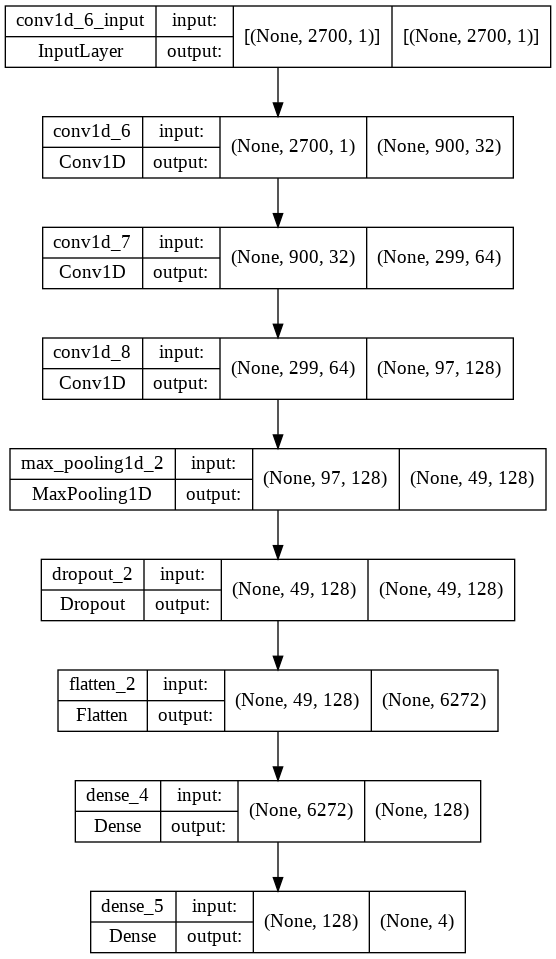

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name='SinWaveCNN')
CNN.add(layers.Conv1D(32,3,3,activation='relu',input_shape=(2700,1)))#第一層需有input_shape
CNN.add(layers.Conv1D(64,6,3,activation='relu'))
CNN.add(layers.Conv1D(128,9,3,activation='relu'))
CNN.add(layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(128,activation='relu'))
#CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(4,activation='softmax'))#0~3(4 layer)
#CNN.add(layers.Dense(4, activation='sigmoid'))

keras.utils.plot_model(CNN,show_shapes=True)

In [14]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy'])

In [16]:
#訓練了第12次
CNN.fit(X, y, epochs=12, batch_size=32)
print(CNN.summary())

Epoch 1/2
1/1 [==============================] - 0s 91ms/step - loss: 0.4373 - accuracy: 0.9444
Epoch 2/2
1/1 [==============================] - 0s 130ms/step - loss: 0.3133 - accuracy: 1.0000
Model: "SinWaveCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 900, 32)           128       
                                                                 
 conv1d_7 (Conv1D)           (None, 299, 64)           12352     
                                                                 
 conv1d_8 (Conv1D)           (None, 97, 128)           73856     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 128)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 128)           0     

In [17]:
#測試數據
import pandas as pd 
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1D'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
  for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = np.load(os.path.join(path,p))
    #print(img_array.shape)
    X_test.append(img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1, 2700, 1)
X_test = X_test/255
predictions = CNN.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)

   id  判斷
0  t1   0
1  t3   0
2  t2   0
3  t4   0


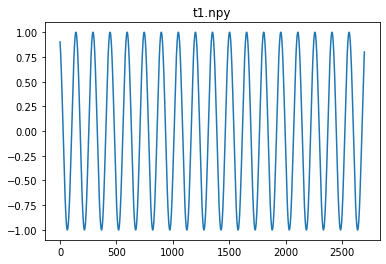

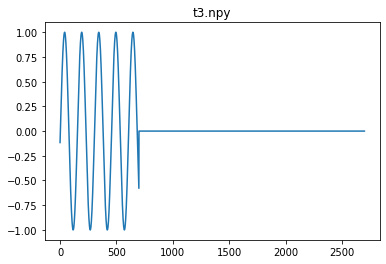

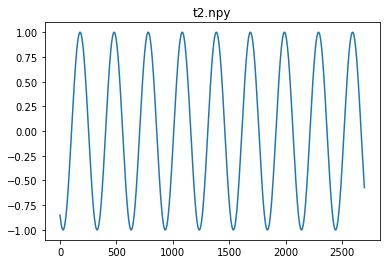

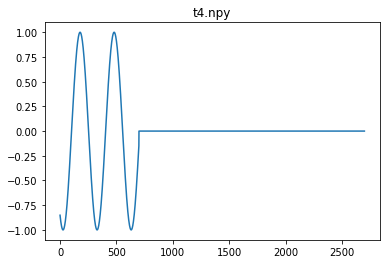

In [18]:
from numpy.lib.type_check import imag
#讀取測試用圖片
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1D'
path = os.path.join(train_dir)

for p in os.listdir(path):
  id_line.append(p.split(".")[0])
  img = np.load(os.path.join(path,p))
  #print(img.shape)
  plt.plot(img.T)
  plt.title(p)
  plt.show()
